Description of the processing below:

- Aim :  
    - In this Project,on the basis of the mobile specification like Battery power, 4G enabled , wifi ,Bluetooth, Ram etc. We are predicting price range of the mobile.

- In this data: (train.csv)
    - battery_power:Total energy a battery can store in one time measured in mAh
    - blue:Has bluetooth or not
    - clock_speed:speed at which microprocessor executes instructions
    - dual_sim:Has dual sim support or not
    - fc:Front Camera mega pixels
    - four_g:Has 4G or not
    - int_memory:Internal Memory in Gigabytes
    - m_dep:Mobile Depth in cm
    - mobile_wt:Weight of mobile phone
    - n_cores:Number of cores of processor
    - pc:Primary Camera mega pixels
    - px_height:Pixel Resolution Height
    - px_width:Pixel Resolution Width
    - ram:Random Access Memory in Megabytes
    - sc_h:Screen Height of mobile in cm
    - sc_w:Screen Width of mobile in cm
    - talk_time:longest time that a single battery charge will last when you are
    - three_g:Has 3G or not
    - touch_screen:Has touch screen or not
    - wifi:Has wifi or not

- Usage:
    - Use the features in the data set and extract the features with high correlation to estimate the price range of mobile phones. This kind of prediction will help the company to compete fiercely with other mobile phone manufacturers. It is also useful for consumers to verify that they are paying the best price for their phone.


### Libraries and Utilities

In [2]:
# import packages
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns

### Load and Check Data

In [3]:
# Load dataset
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# There are no missing values.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

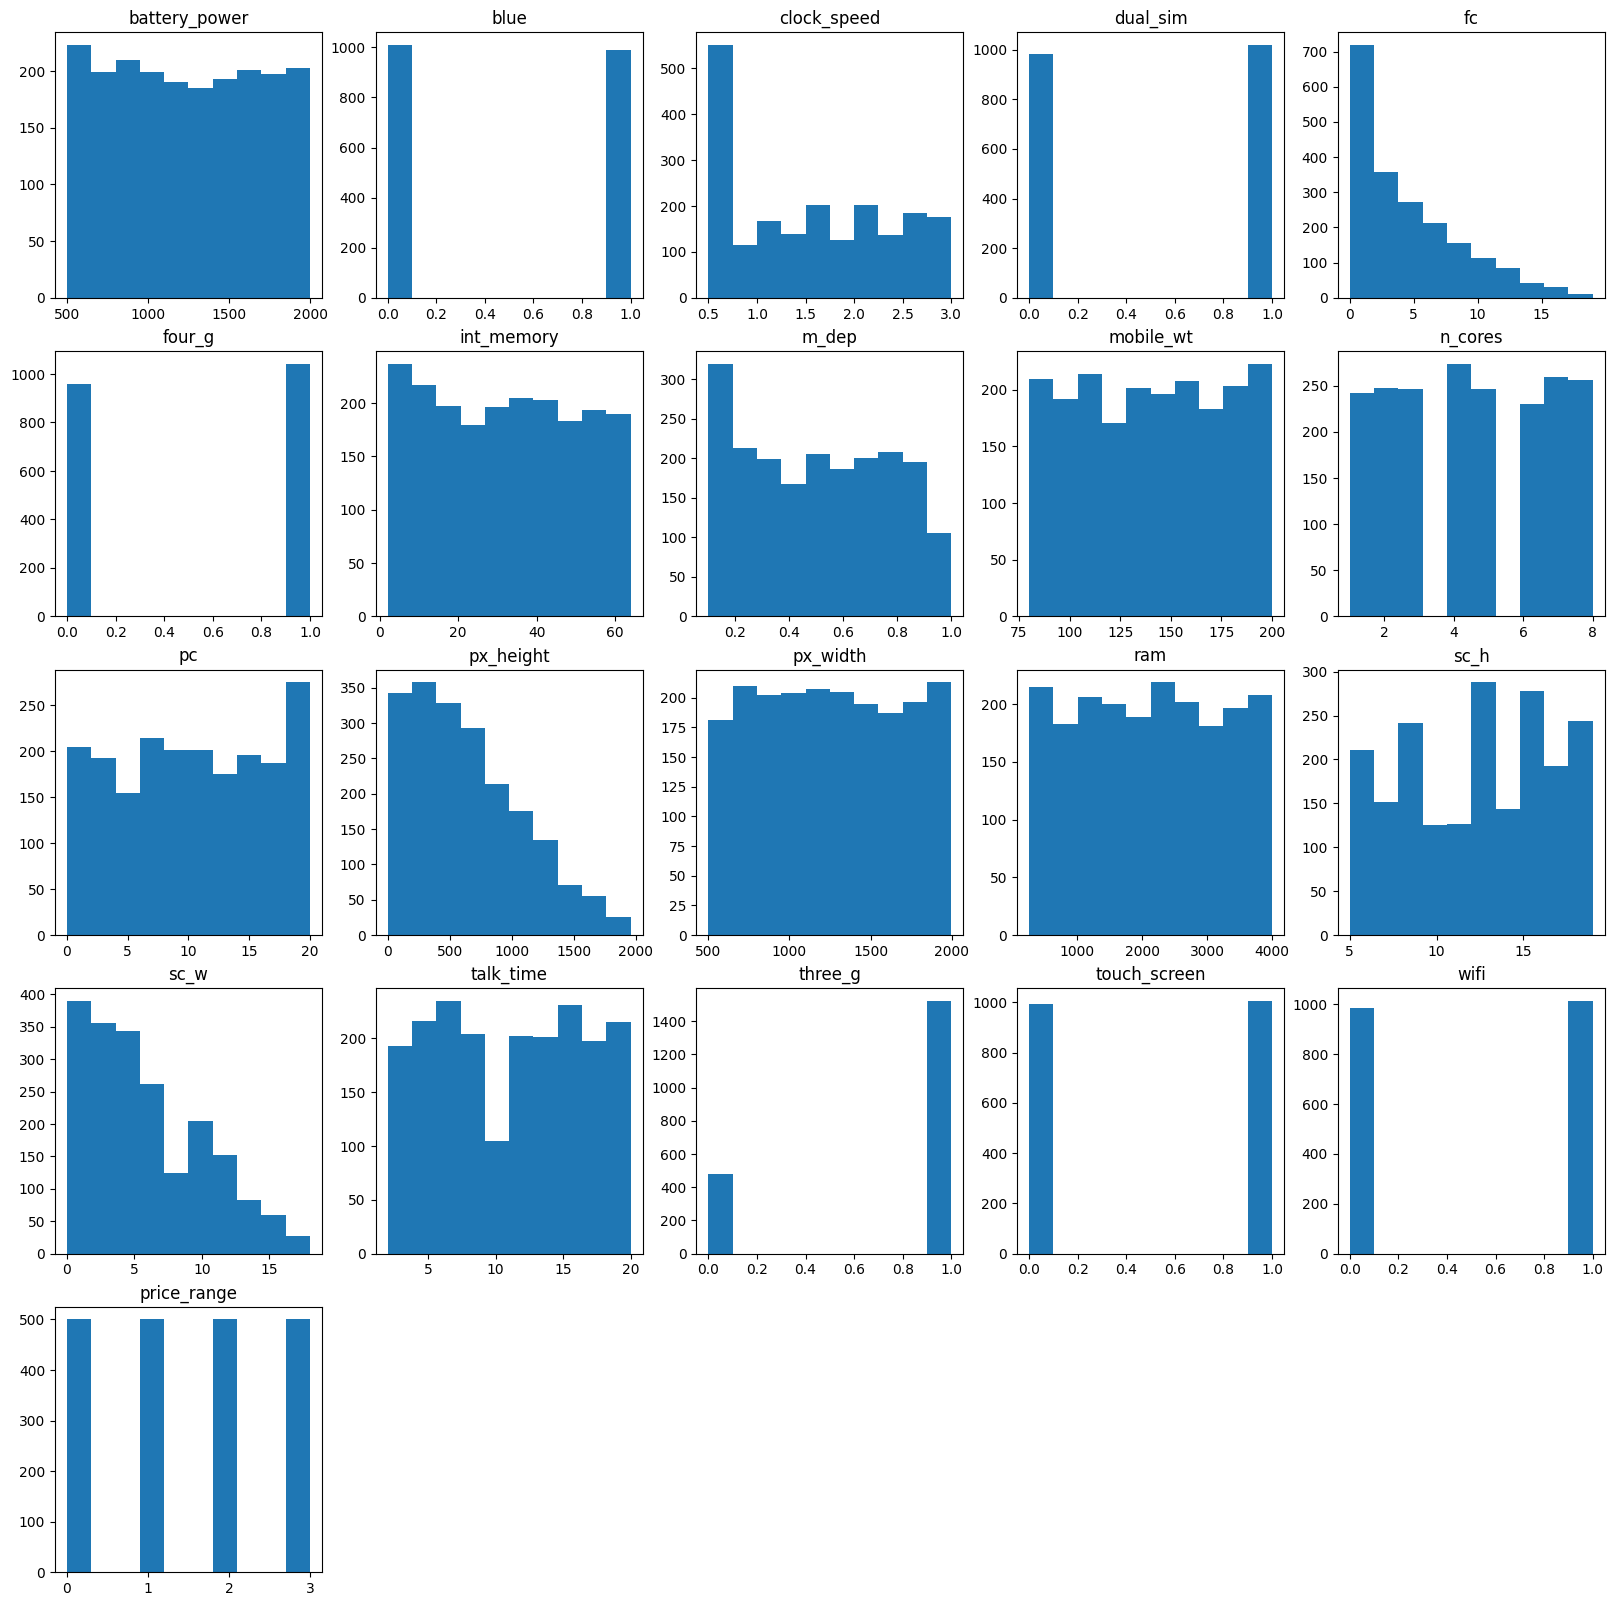

In [7]:
# 資料分布
plt.figure(figsize = (20,20))
j = 1
for i in df.columns:
    plt.subplot(5,5,j)
    plt.title(f'{i}')
    plt.hist(df[i])
    j += 1
plt.show()

In [7]:
# 資料未經過前處理
# 使用隨機森林得到準確率
df_pre = pd.read_csv("train.csv")
y = df_pre["price_range"]
X=  df_pre.drop(["price_range"],axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(criterion = 'entropy',n_estimators=100,random_state=0)
model.fit(X_train, y_train)

# Details
print('RandomForestClassifierModel Train Score is : ' , model.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('RandomForestClassifierModel Accuracy Score is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division=1))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.8975
RandomForestClassifierModel Accuracy Score is  0.8975
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.85      0.84      0.84        91
           2       0.85      0.85      0.85        92
           3       0.93      0.96      0.94       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



### Exploratory Data Analysis

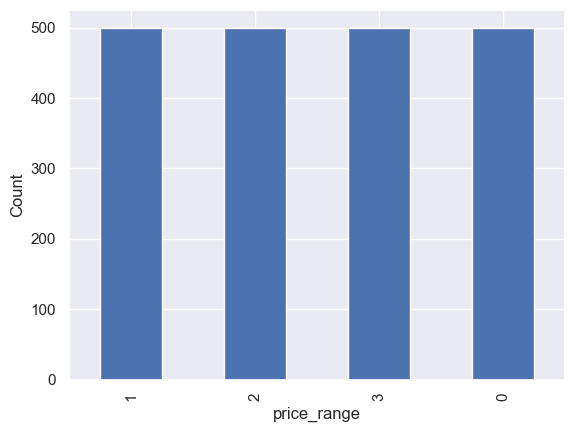

In [8]:
# price range
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

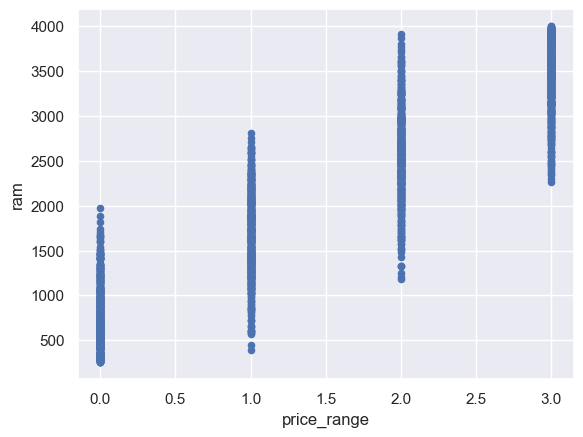

In [9]:
# RAM的售價範圍不斷增加，有從低成本增加為高成本的趨勢
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

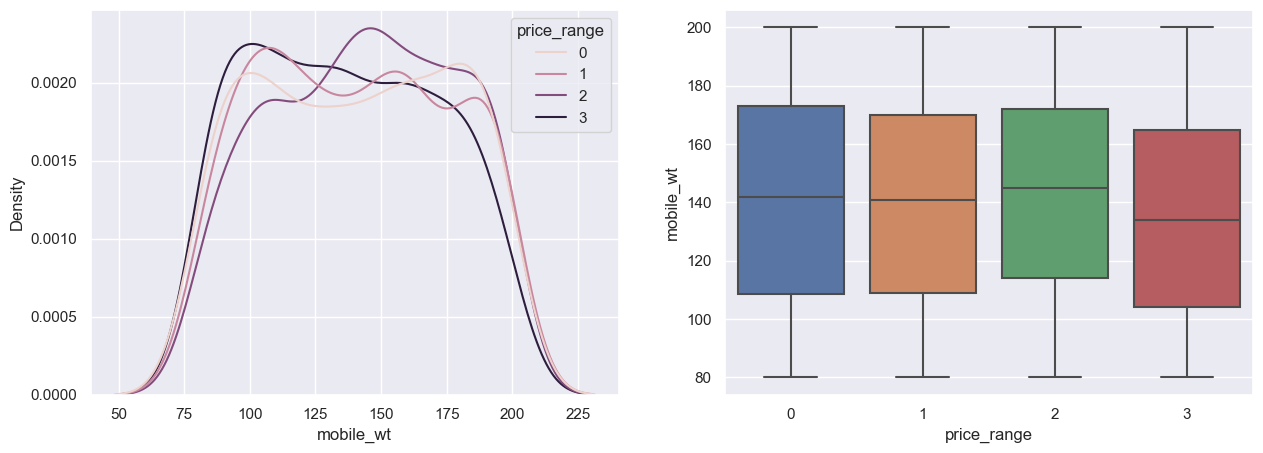

In [10]:
# 昂貴的手機有更輕的趨勢
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

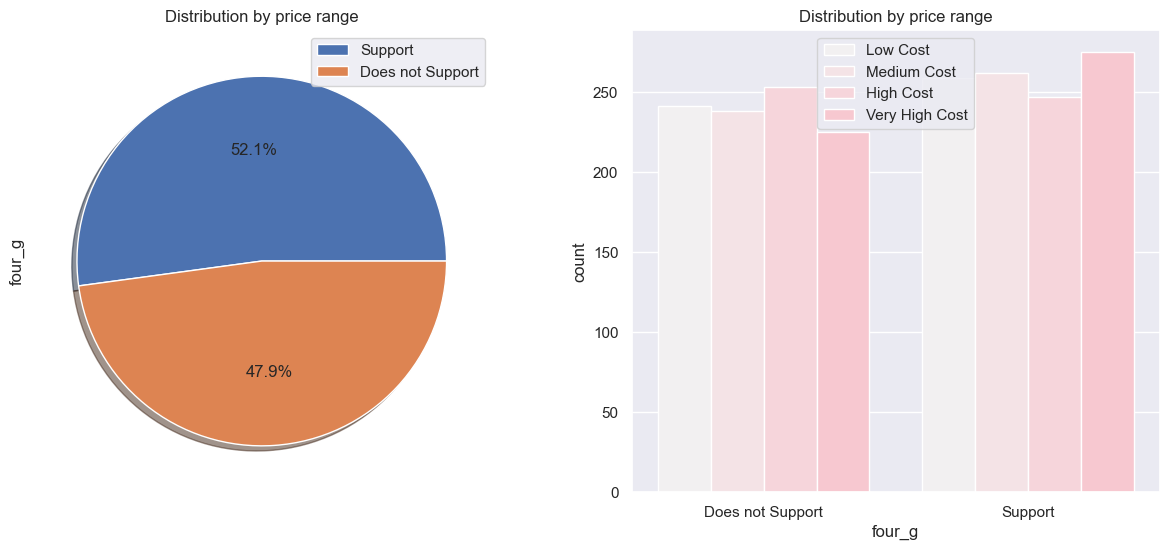

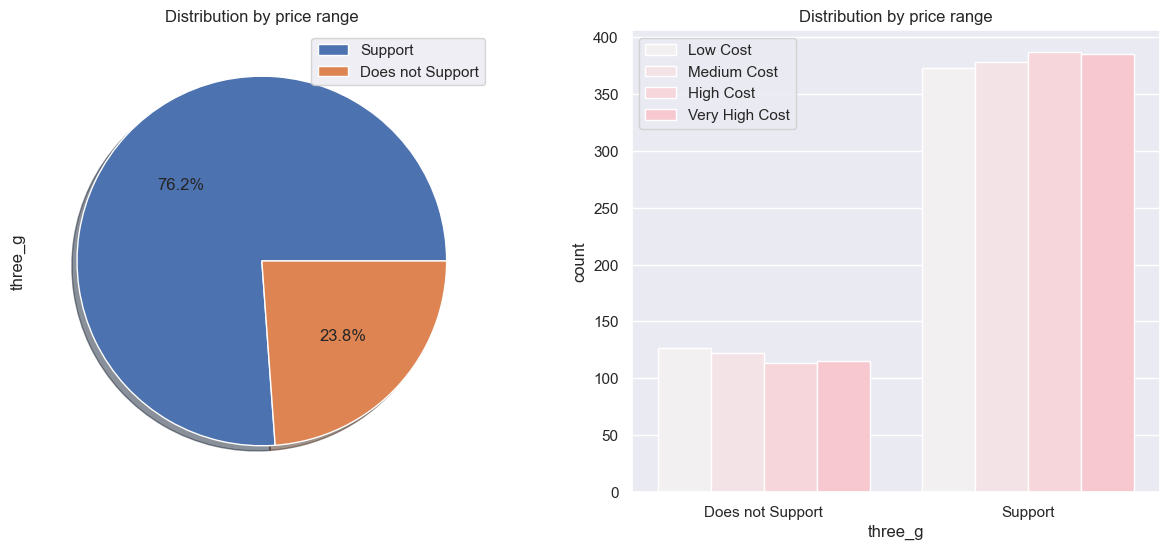

In [11]:
# 3G 的特徵在這個資料集中占比比較多
binary_features = [ 'four_g', 'three_g']
for col in binary_features:
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))
    df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
    ax1.set_title('Distribution by price range')
    ax1.legend(['Support', 'Does not Support'])
    sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
    ax2.set_title('Distribution by price range')
    ax2.set_xlabel(col)
    ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
    ax2.set_xticklabels(['Does not Support', 'Support'])

In [12]:
# convert screen_size from cm to inches, because in real life we use inches to tell a screen size.
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)
# drop sc_h and s_w
df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

df_test['sc_size'] = np.sqrt((df_test['sc_h']**2) + (df_test['sc_w']**2))
df_test['sc_size'] = round(df_test['sc_size']/2.54, 2)
# drop sc_h and s_w
df_test.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

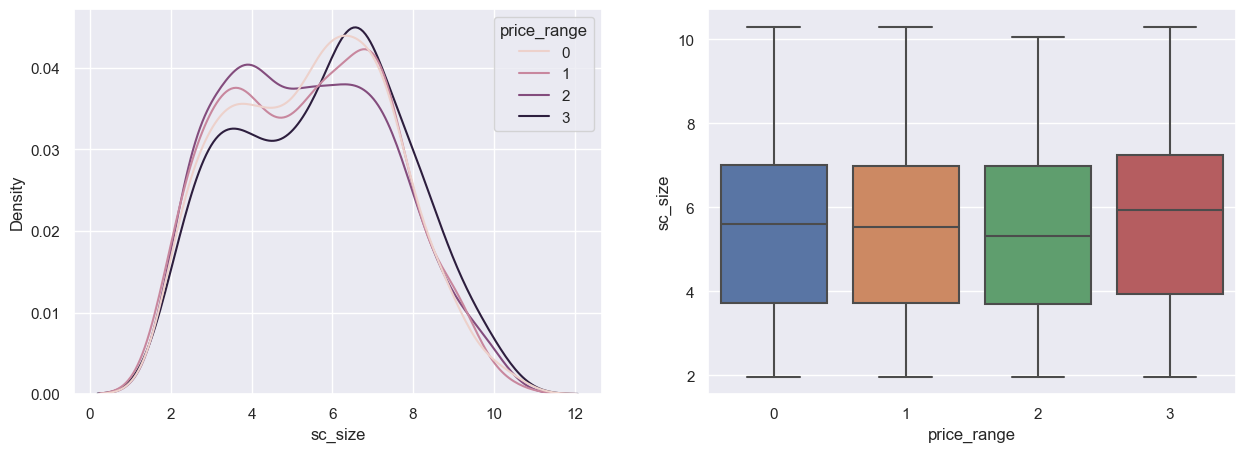

In [13]:
# 在高階機種中，偏好較大的螢幕。隨著售價增加，螢幕尺寸也有些微成長。
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

### Get correlations of each features in dataset

In [14]:
correlation = df.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_size          0.035519
pc               0.033599
three_g          0.023611
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64 



Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_size', 'pc', 'three_g', 'fc', 'talk_time', 'blue',
       'wifi', 'dual_sim', 'four_g', 'n_cores', 'm_dep', 'clock_speed',
       'mobile_wt', 'touch_screen'],
      dtype='object')


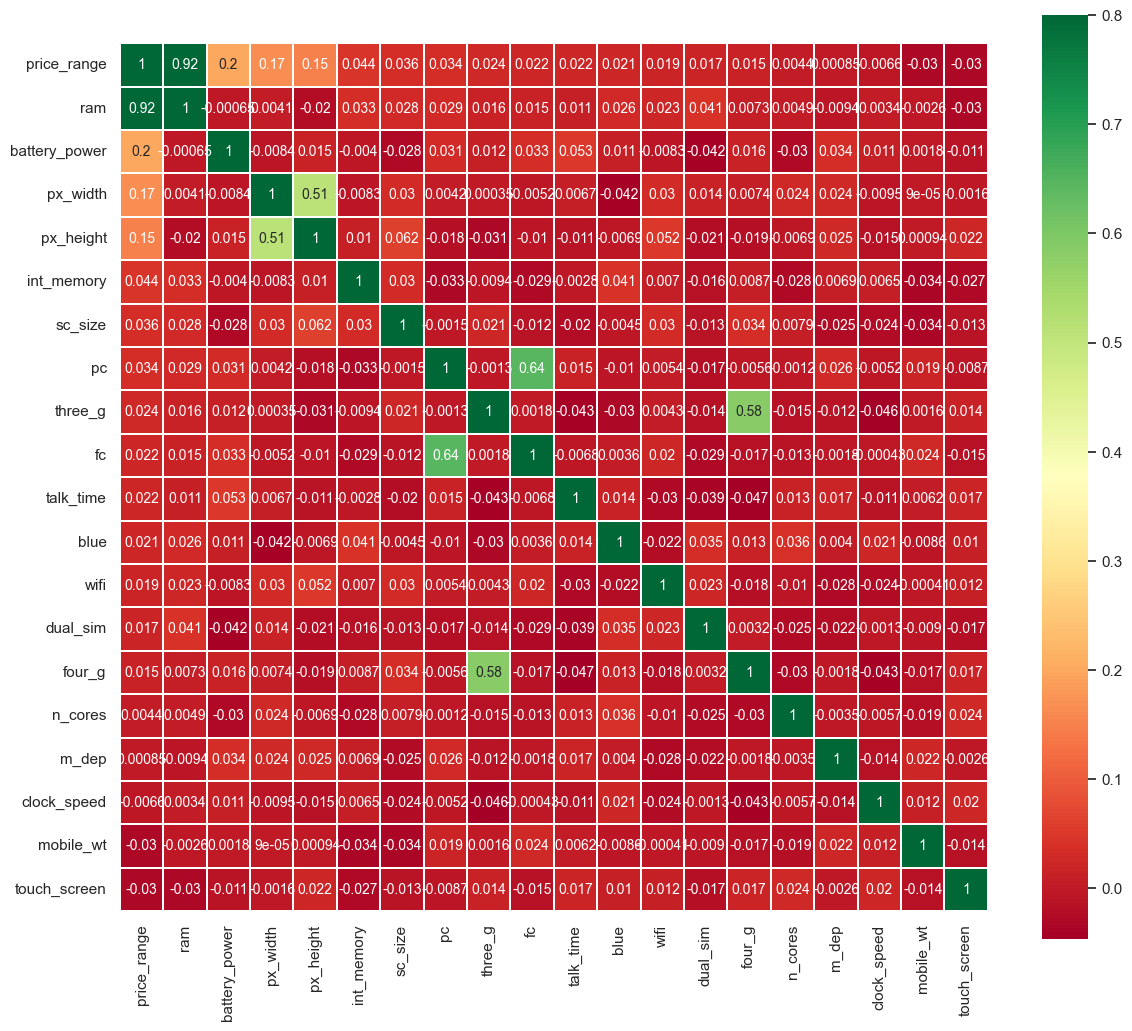

In [15]:
k= 20
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='RdYlGn',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':10},yticklabels = cols.values)
plt.show()


# top_corr_features = corrmat.index
# plt.figure(figsize=(15,15))
# #plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
# 如果px_height增加，px_width也會增加，代表像素會上升，因此可以用一個特徵替換這兩個。
# defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']//1000000
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

Index(['price_range', 'ram', 'battery_power', 'pixels', 'int_memory',
       'sc_size', 'pc', 'three_g', 'fc', 'talk_time'],
      dtype='object')


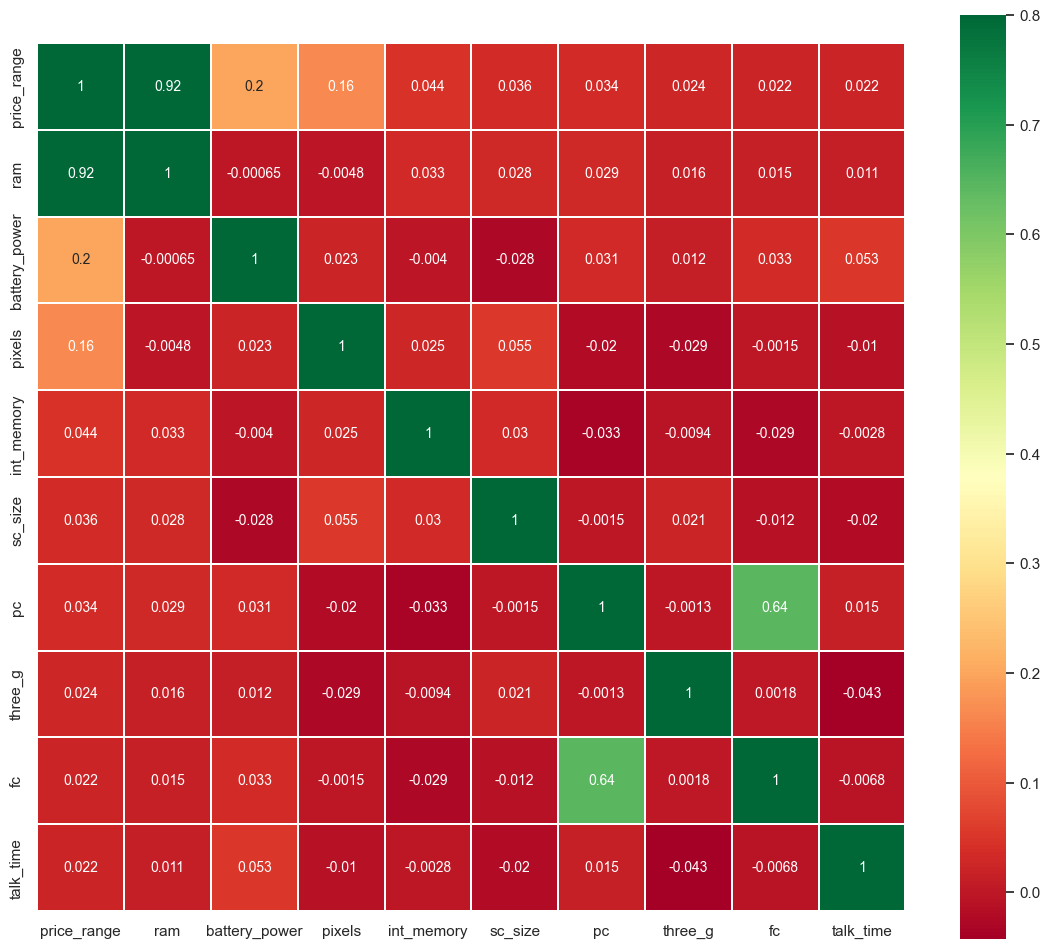

In [17]:
# 經過資料前處理後，使用heatmap觀察相似性
k= 10
correlation = df.corr()
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='RdYlGn',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':10},yticklabels = cols.values)
plt.show()

### Use the correlation coefficient to select the top three important features and price range for comparison

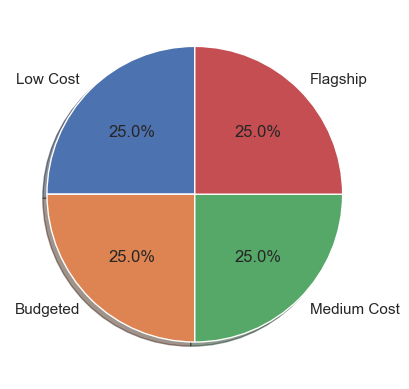

In [18]:
# price range
values=df['price_range'].value_counts().values
labels = ["Low Cost", "Budgeted", "Medium Cost", "Flagship"]
fig1, ax1 = plt.subplots(1)
ax1.pie(values, labels = labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

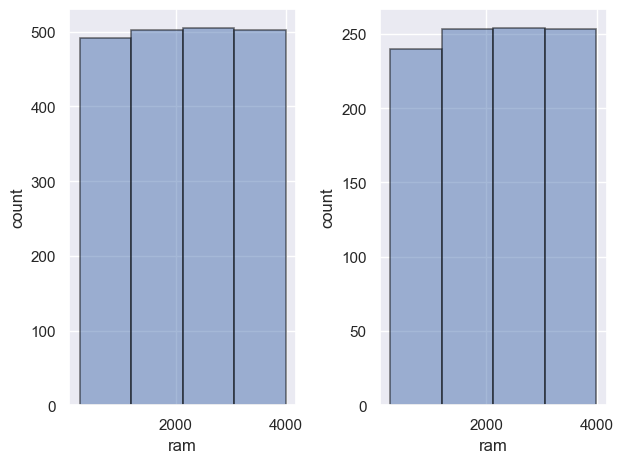

<Figure size 1200x600 with 0 Axes>

In [19]:
# ram
num_bins = 4
fig1, ax1 = plt.subplots(1,2)
plt.figure(figsize=(12,6))
ax1[0].set(xlabel='ram', ylabel="count")
ax1[1].set(xlabel='ram', ylabel="count")
ax1[0].hist('ram',num_bins,data=df,alpha=0.5,edgecolor='black', linewidth=1.2)
ax1[1].hist('ram',num_bins,data=df_test,alpha=0.5,edgecolor='black', linewidth=1.2)
fig1.tight_layout()
plt.show()

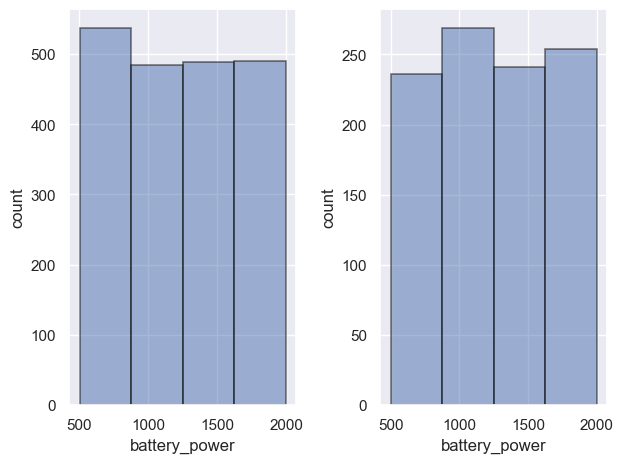

<Figure size 1200x600 with 0 Axes>

In [20]:
# battery_power
num_bins = 4
fig1, ax1 = plt.subplots(1,2)
plt.figure(figsize=(12,6))
ax1[0].set(xlabel='battery_power', ylabel="count")
ax1[1].set(xlabel='battery_power', ylabel="count")
ax1[0].hist('battery_power',num_bins,data=df,alpha=0.5,edgecolor='black', linewidth=1.2)
ax1[1].hist('battery_power',num_bins,data=df_test,alpha=0.5,edgecolor='black', linewidth=1.2)
fig1.tight_layout()
plt.show()

In [21]:
# process pixels of test data
df_test['pixels'] = df_test['px_height']*df_test['px_width']//1000000
# Dropping px_height and px_width
df_test.drop(['px_height', 'px_width'], axis = 1, inplace = True)

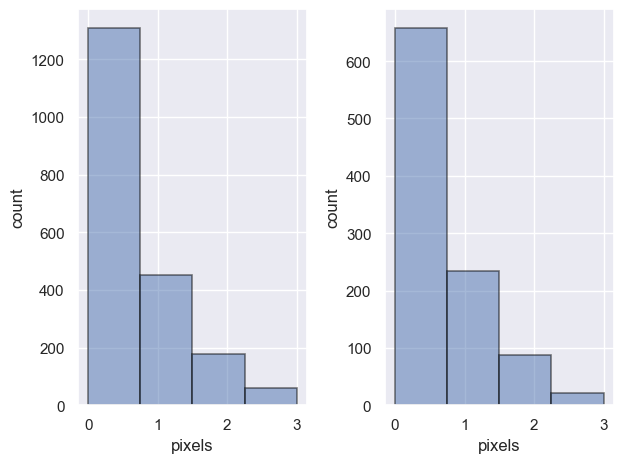

<Figure size 1200x600 with 0 Axes>

In [22]:
# pixels
num_bins = 4
fig1, ax1 = plt.subplots(1,2)
plt.figure(figsize=(12,6))
ax1[0].set(xlabel='pixels', ylabel="count")
ax1[1].set(xlabel='pixels', ylabel="count")
ax1[0].hist('pixels',num_bins,data=df,alpha=0.5,edgecolor='black', linewidth=1.2)
ax1[1].hist('pixels',num_bins,data=df_test,alpha=0.5,edgecolor='black', linewidth=1.2)
fig1.tight_layout()
plt.show()

這份資料集在kaggle上已經被事先被分成訓練資料以及測試資料。上面的部分是針對train.csv和test.csv的同一特徵做比較，利用相關係數選出前三名的特徵(ram、battery_power、pixels)以及price range做比較，可以發現這些資料都已經被處理的很不錯，兩者的分布並無太大差異，因此不需要將兩份資料合併再重新切割。

### Outlier Analysis of Non-Categorical Data

<AxesSubplot:xlabel='talk_time'>

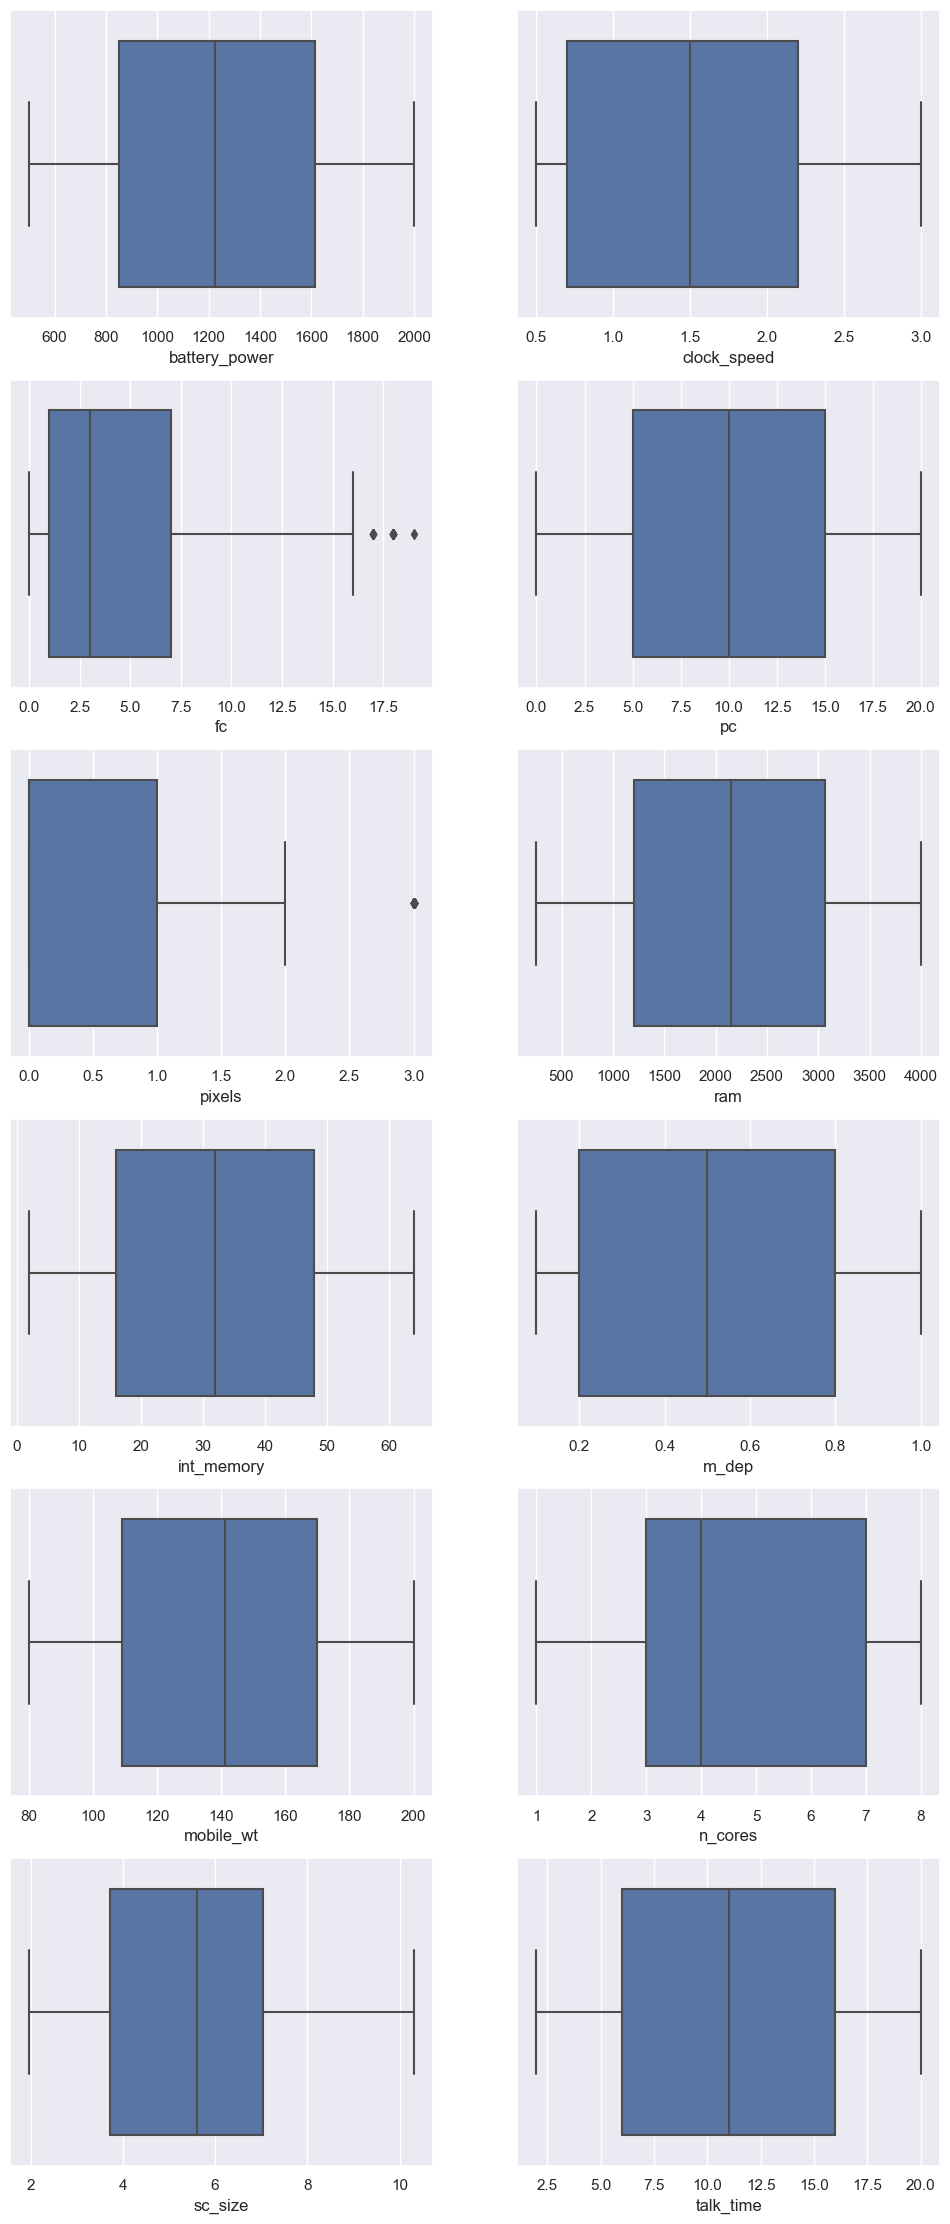

In [23]:
# There are a few outliers in fc and pixels only.
fig, ax = plt.subplots(ncols=2, nrows=6, figsize=(12,28))
sns.boxplot(x=df['battery_power'],ax=ax[0,0])
sns.boxplot(x=df['clock_speed'],ax=ax[0,1])
sns.boxplot(x=df['fc'],ax=ax[1,0])
sns.boxplot(x=df['pc'],ax=ax[1,1])
sns.boxplot(x=df['pixels'],ax=ax[2,0])
sns.boxplot(x=df['ram'],ax=ax[2,1])
sns.boxplot(x=df['int_memory'],ax=ax[3,0])
sns.boxplot(x=df['m_dep'],ax=ax[3,1])
sns.boxplot(x=df['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=df['n_cores'],ax=ax[4,1])
sns.boxplot(x=df['sc_size'],ax=ax[5,0])
sns.boxplot(x=df['talk_time'],ax=ax[5,1])

In [31]:
# 離群值個數
out_num = df[df['fc']>15].count()
# 離群值占整體比例
print(out_num['fc']/ 2000)


0.021


### split data

In [24]:
y = df["price_range"]
X=df.drop(["price_range"],axis=1)

# Scaling values of X
from sklearn.preprocessing import MinMaxScaler 
X_scale = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scale,y,test_size=0.2,random_state=42)
print("x_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",X_test.shape)
print("y_test shape",y_test.shape)

x_train shape (1600, 18)
y_train shape (1600,)
x_test shape (400, 18)
y_test shape (400,)


### use RandomForestClassifier to fit data

In [25]:
model = RandomForestClassifier(criterion = 'entropy',n_estimators=100,random_state=0)
model.fit(X_train, y_train)

# Details
print('RandomForestClassifierModel Train Score is : ' , model.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('RandomForestClassifierModel Accuracy Score is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division=1))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.8825
RandomForestClassifierModel Accuracy Score is  0.8825
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.85      0.84      0.84        91
           2       0.78      0.85      0.81        92
           3       0.94      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



### 各個特徵的重要程度

In [26]:
df_scores = pd.DataFrame(model.feature_importances_)
df_scores.rename(columns={0:'Score'},inplace=True)

df_columns = pd.DataFrame(X.columns)
df_columns.rename(columns={0:'Feature'},inplace=True)


feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores = feature_scores.sort_values(['Score'],ascending=False)
feature_scores.head()

,Feature,Score
11,ram,0.545396
0,battery_power,0.087063
8,mobile_wt,0.041715
6,int_memory,0.040577
16,sc_size,0.040092


[[100   5   0   0]
 [  6  76   9   0]
 [  0   8  78   6]
 [  0   0  13  99]]


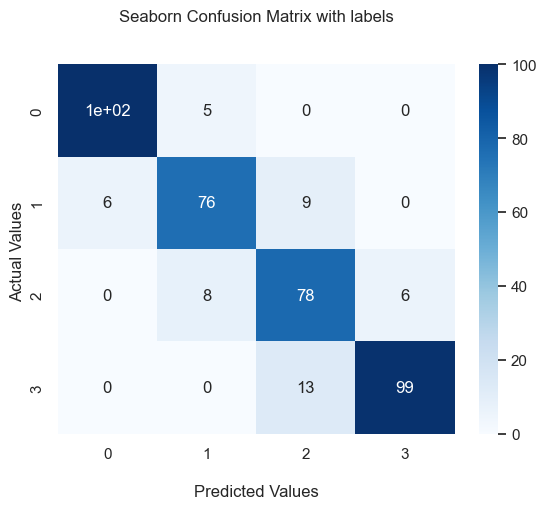

In [27]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

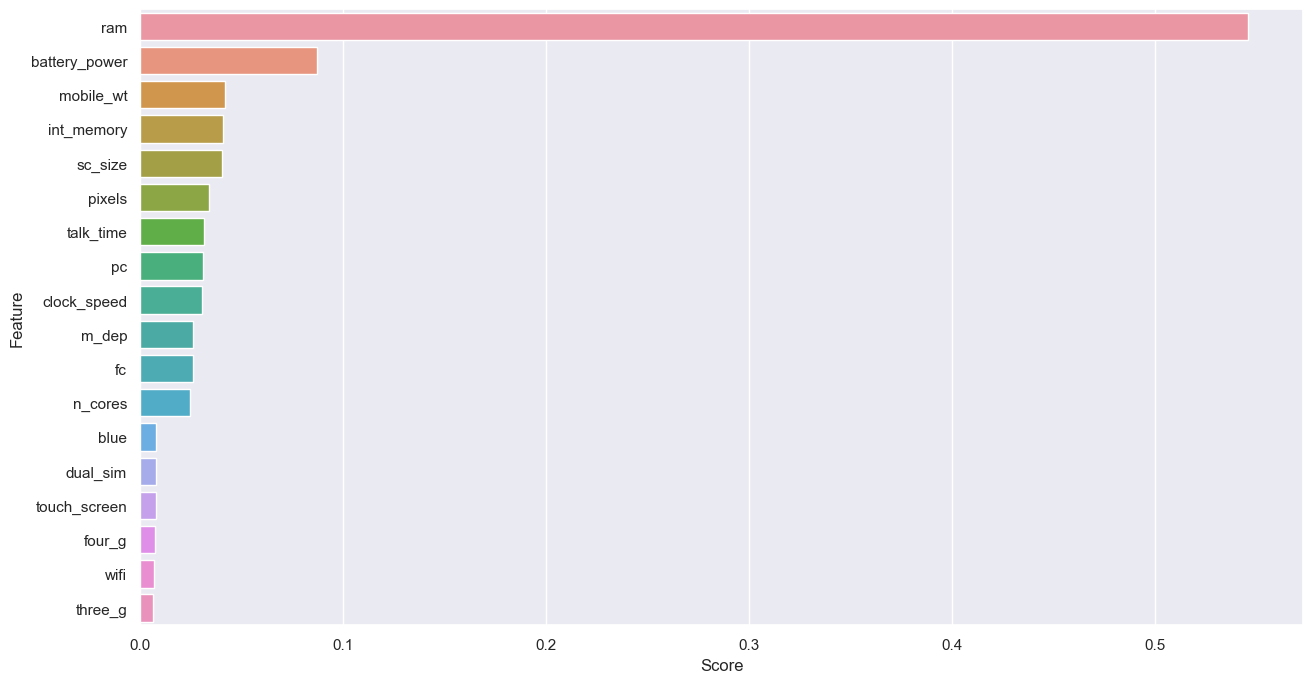

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_scores['Score'], y=feature_scores['Feature'])
plt.show()

### Model parameter adjustment

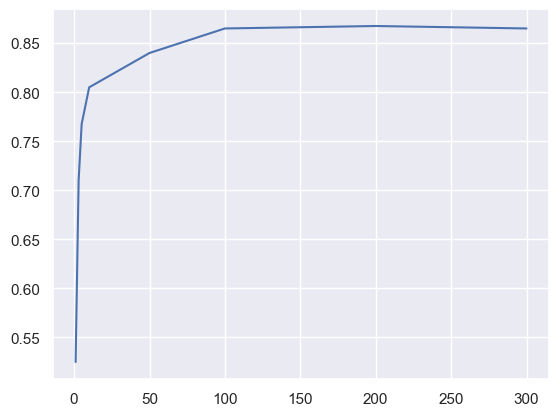

In [29]:
# RandomForest：抗過擬合能力高，特徵幾乎不需要前處理。
# n_estimators 越大 => 由越多決策樹組成，不容易overfitting，accuracy越高

n_estimators = [1,3,5,10,50,100,200,300]
results = []
for i in n_estimators:
    model = RandomForestClassifier(criterion = 'gini',n_estimators=i,random_state=0)
    model.fit(X_train, y_train)
    #Predict Output
    predicted= model.predict(X_test)
    accuracy = accuracy_score(y_test,predicted)
    results.append(accuracy)

plt.plot(n_estimators,results)


In [30]:
rfcs = pd.DataFrame(results,n_estimators,columns=['score'])
rfcs

,score
1,0.5250
3,0.7100
5,0.7675
10,0.8050
50,0.8400
100,0.8650
200,0.8675
300,0.8650


In [31]:
# Scikit-Learn 提供 GridSearchCV 函數，支援同步執行
# GridSearchCV 函數會自動作Cross Validation，並且統計準確率的平均數/標準差，找出最佳參數組合
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
            'max_depth':[7,10,20],
            'min_samples_split':[2,4,6],
            'max_features':['sqrt','log2'],
            'max_leaf_nodes':[10, 20, 40],
            }
model = RandomForestClassifier()
model_GS = GridSearchCV(model, params, scoring='accuracy', cv=3)
model_GS.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [32]:
print("best params : ",model_GS.best_params_)
print("best estimator : ",model_GS.best_estimator_)
print("best score : ",model_GS.best_score_)

best params :  {'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 40, 'min_samples_split': 6, 'n_estimators': 200}
best estimator :  RandomForestClassifier(max_depth=20, max_leaf_nodes=40, min_samples_split=6,
                       n_estimators=200)
best score :  0.8459959209584397


### Add different features to compare the results

選擇了加入不同特徵來去訓練模型，看看對訓練結果有什麼差異：
根據特徵類型：

- 手機外觀
    - mobile_wt：手機重量
    - sc_size：手機的螢幕尺寸，以英吋為單位
    - m_dep：以厘米為單位的移動深度
    - touch_screen：是否有觸控螢幕

- 內部規格
    - ram：以MB為單位的隨機存取記憶體
    - int_memory：以GB為單位的內部記憶體
    - n_cores：處理器核心數
    - clock_speed：微控制器執行指令的速度

- 支援
    - blue：是否有藍牙
    - wifi：有無wifi
    - dual_sim：是否支持雙卡
    - four_g：有無4G
    - three_g: 有沒有3G

- 其他規格
    - pc：主相機百萬像素
    - pixels：像素解析度高度
    - fc：前置鏡頭百萬像素
    - battery_power：電池一次可以儲存的總能量，以 mAh 為單位
    - talk_time：當您在通話時，單次電池充電的最長時間
- 其他規格 + 內部規格


In [33]:
y = df["price_range"]
# 外觀
X_exterior=df[["mobile_wt","sc_size","m_dep","touch_screen"]]

# 內部規格
X_internal_specifications = df[["ram","int_memory","n_cores","clock_speed"]]

# 支援
X_support = df[["blue","wifi","dual_sim","four_g","three_g"]]

# 其他規格
X_other_spec = df[["pc","pixels","battery_power","fc","talk_time"]]

# 其他規格 + 內部規格
X_other_internal = pd.concat([X_internal_specifications,X_other_spec], axis=1)

X_data = [X_exterior,X_support,X_other_spec,X_internal_specifications,X_other_internal]

def change_feature_fit(model,X_split_feature):
    X_train, X_test, y_train, y_test=train_test_split(X_split_feature,y,test_size=0.2,random_state=0)
    model.fit(X_train, y_train)
    #Predict Output
    predicted= model.predict(X_test)
    accuracy = accuracy_score(y_test,predicted)
    return accuracy
# RandomForest
RandomForest = RandomForestClassifier(criterion = 'gini',max_depth=20,n_estimators=200,max_leaf_nodes=40,min_samples_split=2,max_features='sqrt',random_state=0)
RandomForest_acc_feature = []
for X_ in X_data:
    temp = change_feature_fit(RandomForest,X_)
    RandomForest_acc_feature.append(temp)

# KNN
KNN = KNeighborsClassifier(n_neighbors=15)
KNN_acc_feature = []
for X_ in X_data:
    temp = change_feature_fit(KNN,X_)
    KNN_acc_feature.append(temp)


# GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=70, learning_rate=0.9,max_depth=1, random_state=0)
GB_acc_feature = []
for X_ in X_data:
    temp = change_feature_fit(GB,X_)
    GB_acc_feature.append(temp)


In [34]:
rfacf = pd.DataFrame(RandomForest_acc_feature,columns=['score'])
rfacf

,score
0,0.2650
1,0.2650
2,0.3200
3,0.7550
4,0.8625


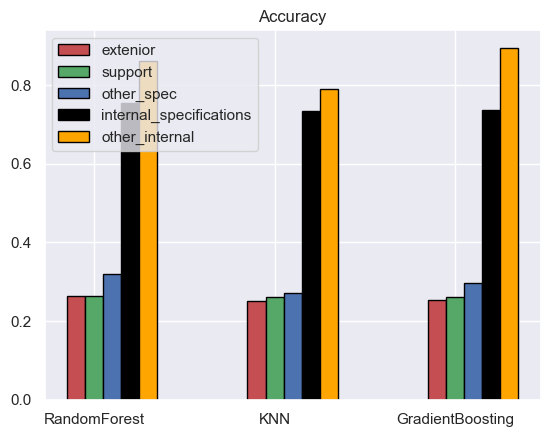

In [35]:
N = 3
ind = np.arange(N) 
width = 0.1
#plt.figure(20,25)
extenior = [RandomForest_acc_feature[0],KNN_acc_feature[0],GB_acc_feature[0]]
bar1 = plt.bar(ind, extenior, width, color = 'r',edgecolor = 'black')

support = [RandomForest_acc_feature[1],KNN_acc_feature[1],GB_acc_feature[1]]
bar2 = plt.bar(ind+width, support, width, color='g',edgecolor = 'black')

other_spec = [RandomForest_acc_feature[2],KNN_acc_feature[2],GB_acc_feature[2]]
bar3 = plt.bar(ind+width*2, other_spec, width, color = 'b',edgecolor = 'black')

internal_specifications = [RandomForest_acc_feature[3],KNN_acc_feature[3],GB_acc_feature[3]]
bar4 = plt.bar(ind+width*3, internal_specifications, width, color = 'black',edgecolor = 'black')

other_internal = [RandomForest_acc_feature[4],KNN_acc_feature[4],GB_acc_feature[4]]
bar5 = plt.bar(ind+width*4, other_internal, width, color = 'orange',edgecolor = 'black')
#plt.xlabel("Dates")
#plt.ylabel('Scores')
plt.title("Accuracy")

plt.xticks(ind+width,['RandomForest', 'KNN','GradientBoosting'])
plt.legend( (bar1, bar2, bar3,bar4,bar5), ('extenior', 'support', 'other_spec','internal_specifications','other_internal') )
plt.show()


### 根據相關係數:


- |相關係數| > 0.04
    - ram              0.917046
    - battery_power    0.200723
    - pixels           0.164641
    - int_memory       0.044435
- |相關係數| > 0.03
    - sc_size          0.035519
    - pc               0.033599
    - mobile_wt       -0.030302
    - touch_screen    -0.030411

- |相關係數| > 0.02
    - three_g          0.023611
    - fc               0.021998
    - talk_time        0.021859
    - blue             0.020573

- |相關係數| > 0.01
    - wifi             0.018785
    - dual_sim         0.017444
    - four_g           0.014772


In [36]:
correlation = df.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
pixels           0.164641
int_memory       0.044435
sc_size          0.035519
pc               0.033599
three_g          0.023611
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64 



In [37]:
# split data by corr
y = df["price_range"]
X_corr_004 =df[["battery_power","ram","int_memory","pixels"]]
X_corr_003 = df[["sc_size","pc","mobile_wt","touch_screen"]]
X_corr_002 = df[["three_g","fc","talk_time","blue"]]
X_corr_001 = df[["wifi","dual_sim","four_g"]]

X_corr = [
    X_corr_004,X_corr_003,X_corr_002,X_corr_001
]


### use different model

In [38]:
def get_model_corr(X_corr):
    # RandomForest
    RandomForest_acc_feature = []
    RandomForest = RandomForestClassifier(criterion = 'gini',max_depth=20,n_estimators=200,max_leaf_nodes=40,min_samples_split=2,max_features='sqrt',random_state=0)
    for X_ in X_corr:
        temp = change_feature_fit(RandomForest,X_)
        RandomForest_acc_feature.append(temp)

    # KNN
    KNN = KNeighborsClassifier(n_neighbors=15)
    KNN_acc_feature = []
    for X_ in X_corr:
        temp = change_feature_fit(KNN,X_)
        KNN_acc_feature.append(temp)

    # GradientBoostingClassifier
    GB = GradientBoostingClassifier(n_estimators=70, learning_rate=0.9,max_depth=1, random_state=0)
    GB_acc_feature = []
    for X_ in X_data:
        temp = change_feature_fit(GB,X_)
        GB_acc_feature.append(temp)


    return RandomForest_acc_feature,KNN_acc_feature,GB_acc_feature

corr_RandomForest_acc_feature,corr_KNN_acc_feature,corr_GB_acc_feature = get_model_corr(X_corr)

In [39]:
corr_rfacf = pd.DataFrame(corr_RandomForest_acc_feature,columns=['score'])
corr_rfacf.sort_values(by='score')

,score
3,0.2100
2,0.2300
1,0.2750
0,0.8875


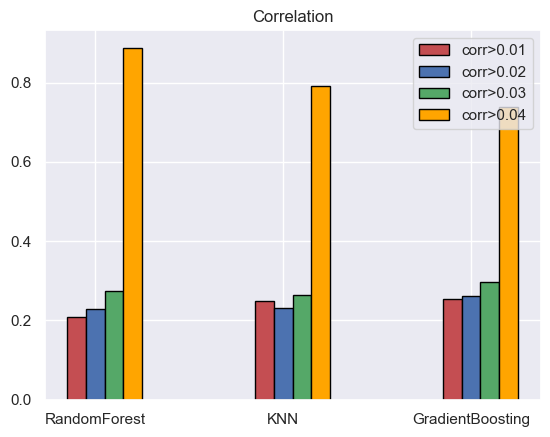

In [40]:
N = 3
ind = np.arange(N) 
width = 0.1
#plt.figure(20,25)
corr_001 = [corr_RandomForest_acc_feature[3],corr_KNN_acc_feature[3],corr_GB_acc_feature[0]]
bar1 = plt.bar(ind, corr_001, width, color = 'r',edgecolor = 'black')

corr_002 = [corr_RandomForest_acc_feature[2],corr_KNN_acc_feature[2],corr_GB_acc_feature[1]]
bar2 = plt.bar(ind+width, corr_002, width, color = 'b',edgecolor = 'black')

corr_003 = [corr_RandomForest_acc_feature[1],corr_KNN_acc_feature[1],corr_GB_acc_feature[2]]
bar3 = plt.bar(ind+width*2, corr_003, width, color='g',edgecolor = 'black')

corr_004 = [corr_RandomForest_acc_feature[0],corr_KNN_acc_feature[0],corr_GB_acc_feature[3]]
bar4 = plt.bar(ind+width*3, corr_004, width, color = 'orange',edgecolor = 'black')

plt.title("Correlation")

plt.xticks(ind+width,['RandomForest', 'KNN','GradientBoosting'])
plt.legend( (bar1, bar2, bar3,bar4), ('corr>0.01', 'corr>0.02', 'corr>0.03','corr>0.04') )
plt.show()